In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# Template Matching

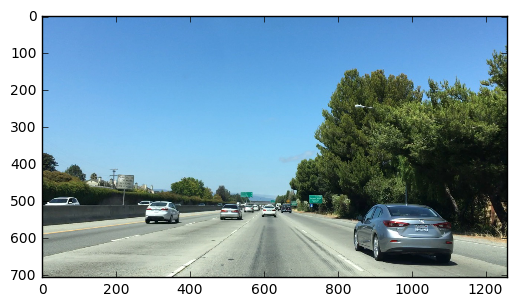

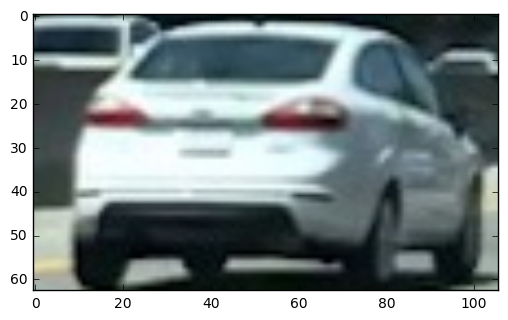

In [3]:
img=mpimg.imread('bbox-example-image.jpg')
img2=img.copy()
plt.imshow(img2)
plt.show()

template=mpimg.imread('cutout1.jpg')
plt.imshow(template)
plt.show()

In [4]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

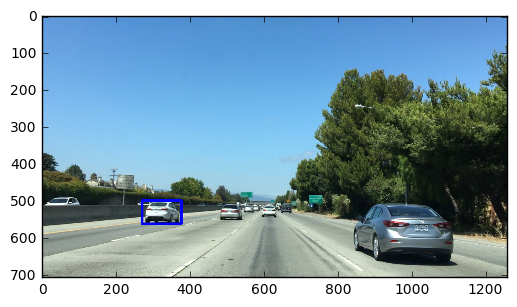

In [5]:
result=cv2.matchTemplate(img2,template,cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

h,w=template.shape[:-1]
img2=draw_boxes(img, [((min_loc), (min_loc[0]+w,min_loc[1]+h))])
plt.imshow(img2)
plt.show()

# Color Histogram


In [34]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook 
def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(6, 6))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

<IPython.core.display.Javascript object>


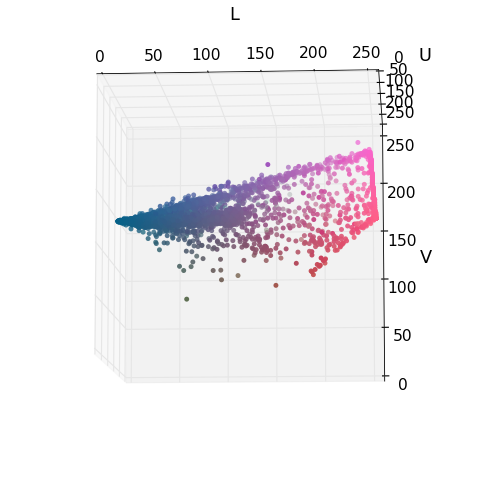

<IPython.core.display.Javascript object>


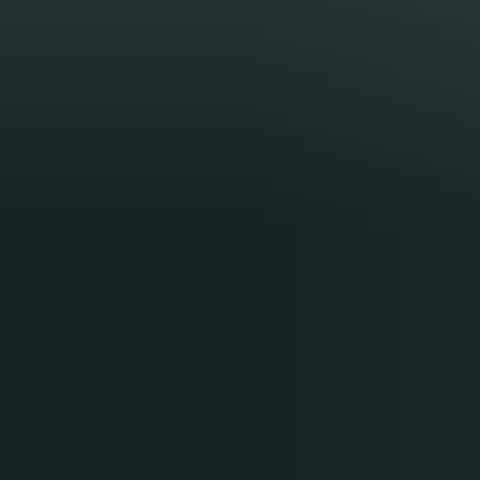

In [41]:
img=cv2.imread('vehicle1.png')
scale=(max(img.shape[0], img.shape[1], 64)/64)
img_small=cv2.resize(img,(int(img.shape[1]/scale), int(img.shape[0]/scale)))

# Convert subsampled image to desired color space(s)
img_small = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
img_small_rgb = img_small/ 255.  # scaled to [0, 1], only for plotting

plot3d(img_small, img_small_rgb, axis_labels=list("LUV"))
plt.show()

img2=cv2.imread('nonvehicle1.png')
scale=(max(img2.shape[0], img2.shape[1], 64)/64)
img_small2=cv2.resize(img2,(int(img2.shape[1]/scale), int(img2.shape[0]/scale)))

# Convert subsampled image to desired color space(s)
img_small2 = cv2.cvtColor(img_small2, cv2.COLOR_BGR2LUV)
img_small_rgb2 = img_small2/ 255.  # scaled to [0, 1], only for plotting

plot3d(img_small2, img_small_rgb2, axis_labels=list("LUV"))
plt.show()

# HOG

(1764,)


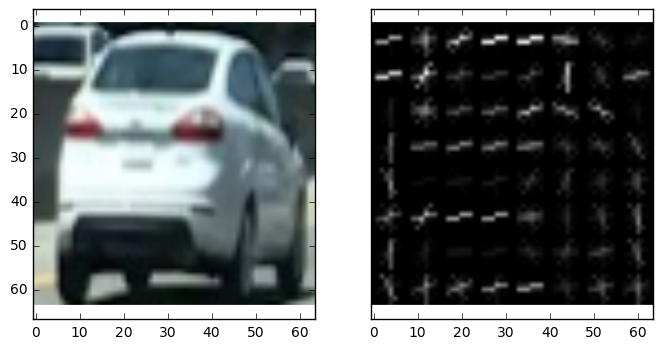

In [55]:
%matplotlib inline
from skimage.feature import hog

img=mpimg.imread('cutout1.jpg')
img=cv2.resize(img,(64,64))

gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
pix_per_cell=8
cell_per_block=2
orient=9

features, hog_image = hog(gray, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=True)


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

print(features.shape)
ax1.imshow(img)
ax2.imshow(hog_image, cmap='gray')

plt.show()

# Combine and Normalise Features

In [60]:

X=np.array([[1,2,3,4],[100,200,300,400]], dtype=np.float64)
X_scaler=StandardScaler().fit(X)
scaled_x=X_scaler.transform(X)
X_scaler.inverse_transform(scaled_x)

array([[   1.,    2.,    3.,    4.],
       [ 100.,  200.,  300.,  400.]])

# SVM

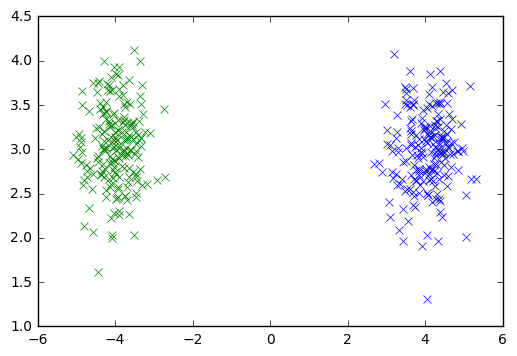

In [55]:
x1=np.random.multivariate_normal([4,3],[[0.2,0],[0,0.2]],200)
y1=np.zeros(len(x1),dtype=int)

x2=np.random.multivariate_normal([-4,3],[[0.2,0],[0,0.2]],200)
y2=np.ones(len(x2),dtype=int)

plt.plot(x1[:,0],x1[:,1],'x',x2[:,0],x2[:,1],'x')
plt.show()

X=np.vstack((x1,x2))
Y=np.hstack((y1,y2))

In [56]:
clf=svm.SVC(C=1, decision_function_shape='ovo', kernel='linear', verbose=True)
clf.fit(X,Y)

[LibSVM]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

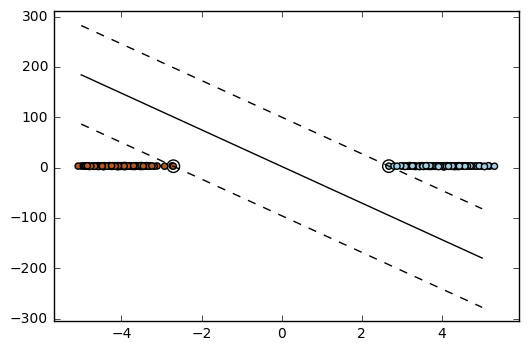

In [57]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

In [35]:
clf.predict([[-3,-3]])

array([1])